# Dcapy -  Arps Class

This section introduces the `Arps` class which is a *'wrapper'* for the Arps Function seen in the previous section. It add certain functionalities to the forecast estimation, like dates, plots, cumulatives, water calculation.  

By taking advantage of python Object-Oriented functionalities it is very convinient to define a class with the required properties to make an Arps declination analysis. With the class are defined methods that help to make the forecast in a very flexible way. That means you can make different kind of forecast from the same Arps declination parameters. 

In [13]:
import os
from dcapy import dca
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Arps Class

As seen in the previous section to define an Arps declination object you must have a *Decline rate* `di`, *b coefficient* `b`, *Initial Time* `Ti`, *Initial rate* `qi`. With these properties you can create a simple Arps Class. The time array to make a forecast can vary depending on the horizon time, frequency or rates limits. In that way you can estimate multiple forecast from the same class depending on the needs. 

Let's define a simple Aprs class by providing the same properties we have been seen. 
We can add a property we had not seen so far which is useful when we incorporates different time units. The units of the declination rate `di`. So far we can handle three periods of time. Days, Months and years.

In [14]:
# Define a Simple Arps Class

a1 = dca.Arps(
    ti = 0,
    di = 0.03,
    qi = 1500,
    b = 0,
    freq_di='M'
)

print(a1)


Declination 
 Ti: 0 
 Qi: 1500.0 bbl/d 
 Di: 0.03 M 
 b: 0.0


We have defined a Arps class with a nominal declination rate of 0.03 monthly. This is usefull if you want to make a forecast on differnt time basis. You can get forecast on daily, monthly or annual basis from the same Arps Class

### Time basis 

When the time is defined with integers, they can represent any of the periods available (days, months or years). For example you can define forecast on daily basis each day or on daily basis each month. Next are the different ways you can create forecast

By calling the method `forecast` and providing either a time array or the start and end, and the frequencies of the output it returns a pandas DataFrame with the forecast with some useful metadata

In [15]:
print('Calculate Daily Basis each day')

fr = a1.forecast(start=0,end=1095,freq_input='D',freq_output='D')
print(fr)

Calculate Daily Basis each day
         oil_rate        oil_cum  iteration   oil_volume
date                                                    
0     1500.000000       0.000000          0  1499.250250
1     1498.500750    1499.250250          0  1498.501000
2     1497.002998    2997.001999          0  1497.003248
3     1495.506743    4493.256745          0  1495.506993
4     1494.011984    5988.015984          0  1494.012233
...           ...            ...        ...          ...
1090   504.324741  995675.259440          0   504.324825
1091   503.820668  996179.332102          0   503.820752
1092   503.317099  996682.900944          0   503.317183
1093   502.814034  997185.966468          0   502.814117
1094   502.311471  997688.529178          0   502.562710

[1095 rows x 4 columns]


Let's Plot it instead

Calculate Daily Basis each day - Plot


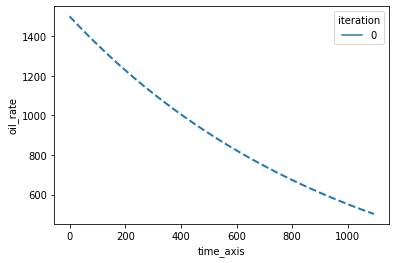

In [16]:
print('Calculate Daily Basis each day - Plot')

fr = a1.plot(start=0,end=1095,freq_input='D',freq_output='D')

Generate forecast with more periods alternatives

Calculate Daily Basis each Month
         oil_rate        oil_cum  iteration    oil_volume
date                                                     
0     1500.000000       0.000000          0  44331.699677
30    1455.668300   44331.699677          0  43676.599812
60    1412.646800   87353.199624          0  42385.761208
90    1370.896778  129103.222093          0  41133.072650
120   1330.380655  169619.344924          0  39917.406635
150   1291.061965  208938.035362          0  38737.668979
180   1252.905317  247094.682883          0  37592.797841
210   1215.876369  284123.631045          0  36481.762759
240   1179.941792  320058.208400          0  35403.563725
270   1145.069242  354930.758495          0  34357.230289
300   1111.227331  388772.668977          0  33341.820679
330   1078.385600  421614.399852          0  32356.420958
360   1046.514489  453485.510893          0  31400.144200
390   1015.585312  484414.688253          0  30472.129692
420    985.570230  514429.770277       

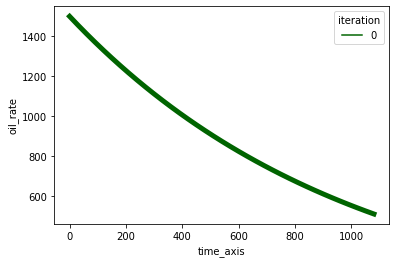

In [17]:
print('Calculate Daily Basis each Month')

fr = a1.forecast(start=0,end=1096,freq_input='D',freq_output='M')
print(fr)

a1.plot(start=0,end=1096,freq_input='D',freq_output='M',rate_kw=dict(palette=['darkgreen'],linestyle='-',linewidth=5))

Calculate Daily Basis each Year
         oil_rate        oil_cum  iteration     oil_volume
date                                                      
0     1500.000000       0.000000          0  458705.023683
365   1041.294976  458705.023683          0  388568.257432
730    722.863485  777136.514865          0  269742.782947
1095   501.809410  998190.589577          0  221054.074712


Text(0, 0.5, 'Oil Rate [bbl/d]')

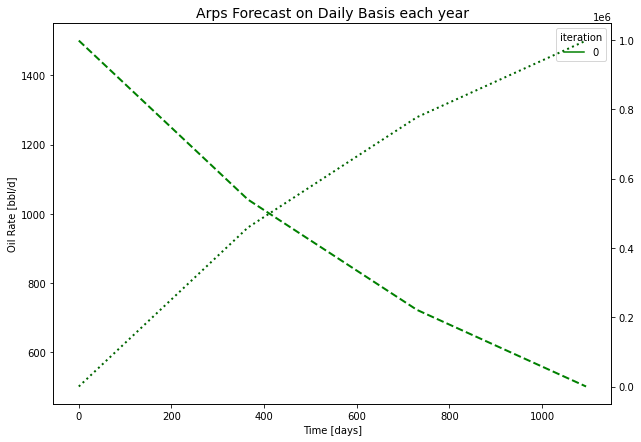

In [18]:
print('Calculate Daily Basis each Year')

fr = a1.forecast(start=0,end=1096,freq_input='D',freq_output='A')
print(fr)

#Assign to a matplotlib axes
fig, ax = plt.subplots(figsize=(10,7))

a1.plot(start=0,end=1096,freq_input='D',freq_output='A',cum=True,rate_kw = {'palette':['green']}, ax=ax)
ax.set_title('Arps Forecast on Daily Basis each year', fontsize=14)
ax.set_xlabel('Time [days]', fontsize=10)
ax.set_ylabel('Oil Rate [bbl/d]', fontsize=10)

Calculate Monthly Basis each Month
         oil_rate        oil_cum  iteration    oil_volume
date                                                     
0     1500.000000       0.000000          0  44331.699677
1     1455.668300   44331.699677          0  43676.599812
2     1412.646800   87353.199624          0  42385.761208
3     1370.896778  129103.222093          0  41133.072650
4     1330.380655  169619.344924          0  39917.406635
5     1291.061965  208938.035362          0  38737.668979
6     1252.905317  247094.682883          0  37592.797841
7     1215.876369  284123.631045          0  36481.762759
8     1179.941792  320058.208400          0  35403.563725
9     1145.069242  354930.758495          0  34357.230289
10    1111.227331  388772.668977          0  33341.820679
11    1078.385600  421614.399852          0  32356.420958
12    1046.514489  453485.510893          0  31400.144200
13    1015.585312  484414.688253          0  30472.129692
14     985.570230  514429.770277     

Text(0, 0.5, 'Oil Rate [bbl/d]')

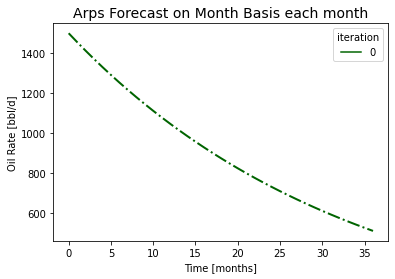

In [19]:
print('Calculate Monthly Basis each Month')

fr = a1.forecast(start=0,end=37,freq_input='M',freq_output='M')
print(fr)

fig, ax = plt.subplots()
a1.plot(start=0,end=37,freq_input='M',freq_output='M',rate_kw=dict(palette=['darkgreen'],linestyle='-.',linewidth=2))
ax.set_title('Arps Forecast on Month Basis each month', fontsize=14)
ax.set_xlabel('Time [months]', fontsize=10)
ax.set_ylabel('Oil Rate [bbl/d]', fontsize=10)


Calculate Monthly Basis each Year
         oil_rate        oil_cum  iteration     oil_volume
date                                                      
0     1500.000000       0.000000          0  453485.510893
12    1046.514489  453485.510893          0  384935.808030
24     730.128384  769871.616060          0  268560.600320
36     509.393288  990606.711533          0  220735.095473


Text(0, 0.5, 'Oil Rate [bbl/d]')

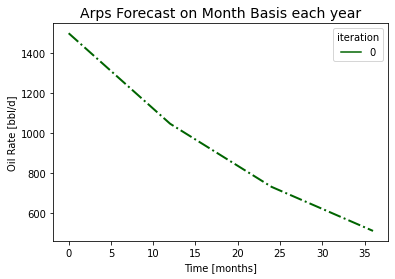

In [20]:
print('Calculate Monthly Basis each Year')

fr = a1.forecast(start=0,end=37,freq_input='M',freq_output='A')
print(fr)

fig, ax = plt.subplots()
a1.plot(start=0,end=37,freq_input='M',freq_output='A',rate_kw=dict(palette=['darkgreen'],linestyle='-.',linewidth=2))
ax.set_title('Arps Forecast on Month Basis each year', fontsize=14)
ax.set_xlabel('Time [months]', fontsize=10)
ax.set_ylabel('Oil Rate [bbl/d]', fontsize=10)

Calculate Annual Basis each Year
         oil_rate       oil_cum  iteration     oil_volume
date                                                     
0     1500.000000  0.000000e+00          0  459783.920767
1     1046.514489  4.597839e+05          0  390282.138697
2      730.128384  7.805643e+05          0  272290.608657
3      509.393288  1.004365e+06          0  223800.860687


Text(0, 0.5, 'Oil Rate [bbl/d]')

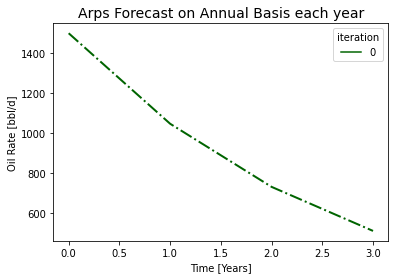

In [21]:
print('Calculate Annual Basis each Year')

fr = a1.forecast(start=0,end=4,freq_input='A',freq_output='A')
print(fr)

fig, ax = plt.subplots()
a1.plot(start=0,end=4,freq_input='A',freq_output='A',rate_kw=dict(palette=['darkgreen'],linestyle='-.',linewidth=2))
ax.set_title('Arps Forecast on Annual Basis each year', fontsize=14)
ax.set_xlabel('Time [Years]', fontsize=10)
ax.set_ylabel('Oil Rate [bbl/d]', fontsize=10)

## Multiple Values 

You may have noticed that the pandas dataframe returned with the forecast has a column name *iteration*. As we have defined so far a singles parameters for the Arps class it is created only one iteration. 

You can declare Multiple values for any of the Arps parameters and they will result on Multiple iteration on the pandas dataframe.


In [22]:
# Define an Arps Class with multiple values

a2 = dca.Arps(
    ti = 0,
    di = 0.03,
    qi = [1500,1000,500],
    b = 0,
    freq_di='M'
)

print(a2)

Declination 
 Ti: 0 
 Qi: [1500.0, 1000.0, 500.0] bbl/d 
 Di: 0.03 M 
 b: 0.0


Calculate Monthly Basis each month - Multiple parameters


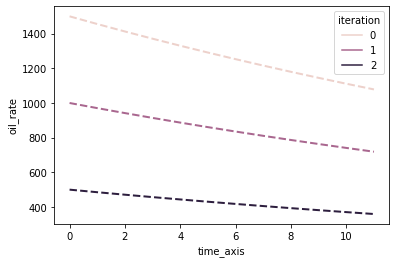

In [23]:
print('Calculate Monthly Basis each month - Multiple parameters')

fr = a2.forecast(start=0,end=12,freq_input='M',freq_output='M')
#print(fr)

fig, ax = plt.subplots()
a2.plot(start=0,end=12,freq_input='M',freq_output='M')


### Estimate Water Rate.

You can add water columns for the returning forecast by providing either a fluid rate or water cut. When any of them is provided the function assumes they are constant and the water estimation are simple substraction.



In [24]:
# Define an Arps Class with multiple values - Fluid rate

a3 = dca.Arps(
    ti = 0,
    di = 0.03,
    qi = [1500,1450],
    b = [0,1],
    freq_di='M', 
    fluid_rate = 2000
)

fr = a3.forecast(start=0,end=12,freq_input='M',freq_output='M')
print(fr)

         oil_rate        oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                    
0     1500.000000       0.000000          0  44331.699677      2000.0   
1     1455.668300   44331.699677          0  43676.599812      2000.0   
2     1412.646800   87353.199624          0  42385.761208      2000.0   
3     1370.896778  129103.222093          0  41133.072650      2000.0   
4     1330.380655  169619.344924          0  39917.406635      2000.0   
5     1291.061965  208938.035362          0  38737.668979      2000.0   
6     1252.905317  247094.682883          0  37592.797841      2000.0   
7     1215.876369  284123.631045          0  36481.762759      2000.0   
8     1179.941792  320058.208400          0  35403.563725      2000.0   
9     1145.069242  354930.758495          0  34357.230289      2000.0   
10    1111.227331  388772.668977          0  33341.820679      2000.0   
11    1078.385600  421614.399852          0  32841.

/Users/scuervo91/Documents/dev/dcapy/dcapy/dca/arps.py:87: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


In [25]:
a4 = dca.Arps(
    ti = 0,
    di = 0.03,
    qi = [1500,1450],
    b = [0,1],
    freq_di='M', 
    bsw = 0.6
)

fr = a4.forecast(start=0,end=12,freq_input='M',freq_output='M')
print(fr)

         oil_rate        oil_cum  iteration    oil_volume  bsw   water_rate  \
date                                                                          
0     1500.000000       0.000000          0  44331.699677  0.6  2250.000000   
1     1455.668300   44331.699677          0  43676.599812  0.6  2183.502450   
2     1412.646800   87353.199624          0  42385.761208  0.6  2118.970201   
3     1370.896778  129103.222093          0  41133.072650  0.6  2056.345167   
4     1330.380655  169619.344924          0  39917.406635  0.6  1995.570983   
5     1291.061965  208938.035362          0  38737.668979  0.6  1936.592947   
6     1252.905317  247094.682883          0  37592.797841  0.6  1879.357976   
7     1215.876369  284123.631045          0  36481.762759  0.6  1823.814553   
8     1179.941792  320058.208400          0  35403.563725  0.6  1769.912687   
9     1145.069242  354930.758495          0  34357.230289  0.6  1717.603862   
10    1111.227331  388772.668977          0  33341.8

/Users/scuervo91/Documents/dev/dcapy/dcapy/dca/arps.py:87: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


Remember you can pass a time list with a custom time distribution

In [26]:
fr = a4.forecast(time_list=[0,2,3,4,6,8,12],freq_input='M',freq_output='M')
print(fr)

         oil_rate        oil_cum  iteration     oil_volume  bsw   water_rate  \
date                                                                           
0     1500.000000       0.000000          0   87353.199624  0.6  2250.000000   
2     1412.646800   87353.199624          0   64551.611047  0.6  2118.970201   
3     1370.896778  129103.222093          0   41133.072650  0.6  2056.345167   
4     1330.380655  169619.344924          0   58995.730395  0.6  1995.570983   
6     1252.905317  247094.682883          0   75219.431738  0.6  1879.357976   
8     1179.941792  320058.208400          0  103195.414005  0.6  1769.912687   
12    1046.514489  453485.510893          0  133427.302493  0.6  1569.771734   
0     1450.000000       0.000000          1   84489.916780  0.6  2175.000000   
2     1367.924528   84489.916780          1   62478.829775  0.6  2051.886792   
3     1330.275229  124957.659550          1   39918.338458  0.6  1995.412844   
4     1294.642857  164326.593695        

/Users/scuervo91/Documents/dev/dcapy/dcapy/dca/arps.py:87: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


### Using Arps class with dates

You can also define the Arps class with dates. Like before, the output frequency approach also works

In [27]:
a5 = dca.Arps(
    ti = date(2021,1,1),
    di = [0.03,0.05],
    qi = 1500,
    b = 0,
    freq_di='M', 
    fluid_rate = 2000
)
print(a5)

Declination 
 Ti: 2021-01-01 
 Qi: 1500.0 bbl/d 
 Di: [0.03, 0.05] M 
 b: 0.0


In [28]:
fr = a5.forecast(start=date(2021,1,1),end=date(2021,1,10),freq_output='D')
print(fr.head())
print(fr.tail())

               oil_rate      oil_cum  iteration   oil_volume  fluid_rate  \
date                                                                       
2021-01-01  1500.000000     0.000000          0  1499.250250      2000.0   
2021-01-02  1498.500750  1499.250250          0  1498.501000      2000.0   
2021-01-03  1497.002998  2997.001999          0  1497.003248      2000.0   
2021-01-04  1495.506743  4493.256745          0  1495.506993      2000.0   
2021-01-05  1494.011984  5988.015984          0  1494.012233      2000.0   

            water_rate       bsw       wor    water_cum  fluid_cum  \
date                                                                 
2021-01-01  500.000000  0.250000  0.333333     0.000000        0.0   
2021-01-02  501.499250  0.250750  0.334667   501.499250     2000.0   
2021-01-03  502.997002  0.251499  0.336003  1004.496252     4000.0   
2021-01-04  504.493257  0.252247  0.337339  1508.989509     6000.0   
2021-01-05  505.988016  0.252994  0.338677  201

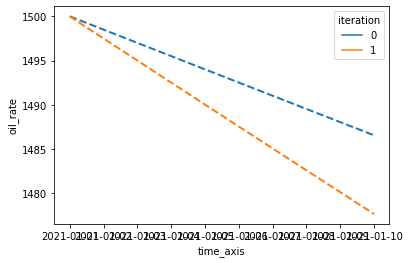

In [29]:
a5.plot(start=date(2021,1,1),end=date(2021,1,10),freq_output='D')

In [17]:
fr = a5.forecast(start=date(2021,1,1),end=date(2022,1,1),freq_output='M')
print(fr)

            oil_rate        oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                       
2021-01  1500.000000       0.000000          0  45786.640386      2000.0   
2021-02  1454.213360   45786.640386          0  42969.923132      2000.0   
2021-03  1414.060154   85939.846264          0  41658.290854      2000.0   
2021-04  1370.896778  129103.222093          0  41839.749330      2000.0   
2021-05  1330.380655  169619.344924          0  40562.614959      2000.0   
2021-06  1289.771548  210228.452011          0  39363.808516      2000.0   
2021-07  1251.653038  248346.961956          0  38162.250820      2000.0   
2021-08  1213.447046  286552.953650          0  37622.883693      2000.0   
2021-09  1176.407271  323592.729343          0  35903.932453      2000.0   
2021-10  1141.639181  358360.818557          0  34807.985491      2000.0   
2021-11  1106.791300  393208.700324          0  33779.254051      2000.0   
2021-12  107

In [18]:
fr = a5.forecast(start=date(2021,1,1),end=date(2026,1,1),freq_output='A')
print(fr)

         oil_rate       oil_cum  iteration     oil_volume  fluid_rate  \
date                                                                    
2021  1500.000000  0.000000e+00          0  458705.023683      2000.0   
2022  1041.294976  4.587050e+05          0  388568.257432      2000.0   
2023   722.863485  7.771365e+05          0  269742.782947      2000.0   
2024   501.809410  9.981906e+05          0  187428.626667      2000.0   
2025   348.006232  1.151994e+06          0  130112.324911      2000.0   
2026   241.584761  1.258415e+06          0  106421.471200      2000.0   
2021  1500.000000  0.000000e+00          1  410168.511963      2000.0   
2022   816.385813  4.101685e+05          1  316702.840738      2000.0   
2023   444.323864  6.334057e+05          1  172367.804160      2000.0   
2024   241.826466  7.549041e+05          1   93878.173091      2000.0   
2025   131.396621  8.211620e+05          1   51093.872466      2000.0   
2026    71.513558  8.570919e+05          1   35929.

Plot them

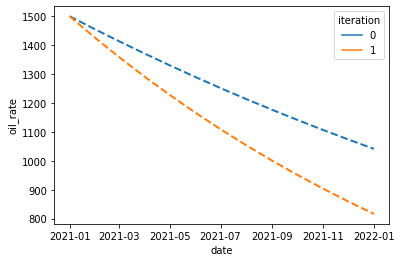

In [19]:
a5.plot(start=date(2021,1,1),end=date(2022,1,1),freq_output='M')
